In [0]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression 

In [0]:
df=pd.read_csv("german_credit_data.csv")

In [4]:
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [5]:
pd.get_dummies(df["Housing"])

,free,own,rent
0,0,1,0
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
995,0,1,0
996,0,1,0
997,0,1,0
998,1,0,0


In [6]:
pd.get_dummies(df["Sex"])


,female,male
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1
...,...,...
995,1,0
996,0,1
997,0,1
998,0,1


In [7]:
pd.get_dummies(df["Saving accounts"])

,little,moderate,quite rich,rich
0,0,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
995,1,0,0,0
996,1,0,0,0
997,1,0,0,0
998,1,0,0,0


In [8]:
pd.get_dummies(df["Checking account"])


,little,moderate,rich
0,1,0,0
1,0,1,0
2,0,0,0
3,1,0,0
4,1,0,0
...,...,...,...
995,0,0,0
996,1,0,0
997,0,0,0
998,1,0,0


In [9]:
pd.get_dummies(df["Purpose"])


,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
995,0,0,0,0,1,0,0,0
996,0,1,0,0,0,0,0,0
997,0,0,0,0,0,1,0,0
998,0,0,0,0,0,1,0,0


In [10]:
pd.get_dummies(df["Risk"])

,bad,good
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
995,0,1
996,0,1
997,0,1
998,1,0


In [0]:
df_f =df [df["Sex"].str.contains("female")]
df_m =df [df["Sex"].str.contains("male")]

In [12]:
df_f.median()

Unnamed: 0        516.0
Age                29.0
Job                 2.0
Credit amount    1959.0
Duration           18.0
dtype: float64

In [13]:
df_f

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
10,10,25,female,2,rent,little,moderate,1295,12,car,bad
11,11,24,female,2,rent,little,little,4308,48,business,bad
12,12,22,female,2,own,little,moderate,1567,12,radio/TV,good
14,14,28,female,2,rent,little,little,1403,15,car,good
...,...,...,...,...,...,...,...,...,...,...,...
976,976,64,female,2,own,little,moderate,753,6,radio/TV,good
982,982,28,female,3,own,moderate,rich,2923,21,car,good
985,985,25,female,2,rent,little,little,1433,15,furniture/equipment,good
987,987,64,female,2,own,moderate,NaN,1409,13,radio/TV,good


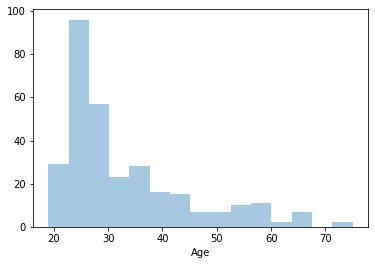

In [32]:
sns.distplot(df_f["Age"].dropna(), kde=False)

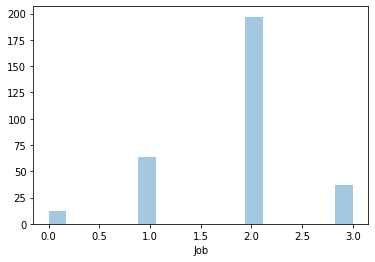

In [34]:
sns.distplot(df_f["Job"].dropna(), kde=False)

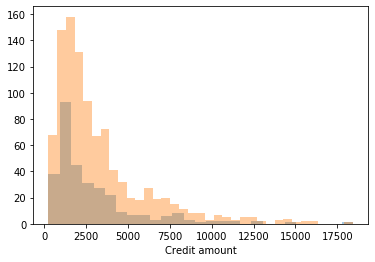

In [67]:
sns.distplot(df_f["Credit amount"].dropna(), kde=False)
sns.distplot(df_m["Credit amount"].dropna(), kde=False)

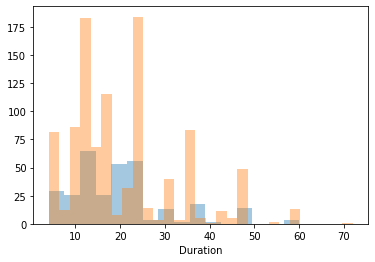

In [38]:
sns.distplot(df_f["Duration"].dropna(), kde=False)
sns.distplot(df_m["Duration"].dropna(), kde=False)

In [0]:
lr =LogisticRegression()

In [0]:
x= df[["Age","Job","Credit amount"]]

In [0]:
y= df["Risk"]

In [42]:
lr.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
lr.score(x,y) 

0.712

In [44]:
lr.predict_proba([[50,2,1000]])# 

array([[0.19181064, 0.80818936]])

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train , y_test =train_test_split(x,y,test_size=  0.7) # test size divide la muestra para entrenar y otra para provar 
lr =LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.71

In [0]:
lr1=LogisticRegression()

In [0]:
a= df[["Age","Duration"]]

In [0]:
b= df["Risk"]

In [70]:
lr1.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
lr1.score(x,y) 

0.712